# Loading packages

In [375]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, roc_auc_score, roc_curve, RocCurveDisplay, classification_report
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# bin numerical data, scale data, encode data
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from itertools import product
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df = pd.read_csv('Train.csv')

In [376]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


# EDA

In [4]:
# Let’s observe the shape of our datasets.
print('df data shape :', df.shape)

df data shape : (23524, 13)


In [5]:
print('missing values:', df.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [379]:
 print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [7]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,23524,4,Rwanda,8735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,23524.0,NaN,NaN,NaN,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
uniqueid,23524,8735,uniqueid_1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bank_account,23524,2,No,20212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_type,23524,2,Rural,14343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cellphone_access,23524,2,Yes,17454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
household_size,23524.0,NaN,NaN,NaN,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,NaN,NaN,NaN,38.80522,16.520569,16.0,26.0,35.0,49.0,100.0
gender_of_respondent,23524,2,Female,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship_with_head,23524,6,Head of Household,12831,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Profile of potential clients

<Figure size 800x600 with 0 Axes>

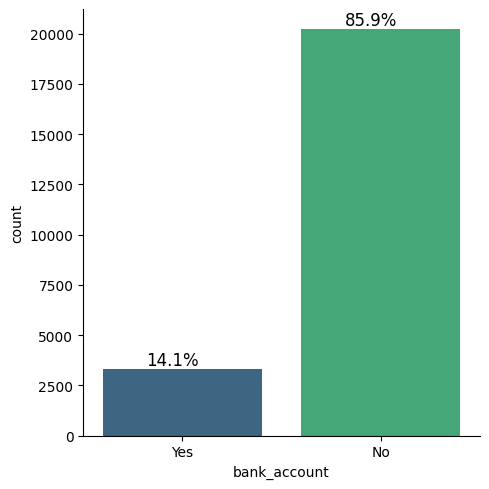

In [381]:
# Create the catplot graph
plt.figure(figsize=(8, 6))
ax = sns.catplot(x="bank_account", kind="count", data=df, palette="viridis")

# Substitute the categories labels
df['bank_account'] = df['bank_account'].replace({0: 'Não', 1: 'Sim'})

# Add the percentual on the bars
total = len(df['bank_account'])
for p in ax.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 20
    ax.ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12, color='black')

# Show the graph
plt.show()

<Figure size 1000x600 with 0 Axes>

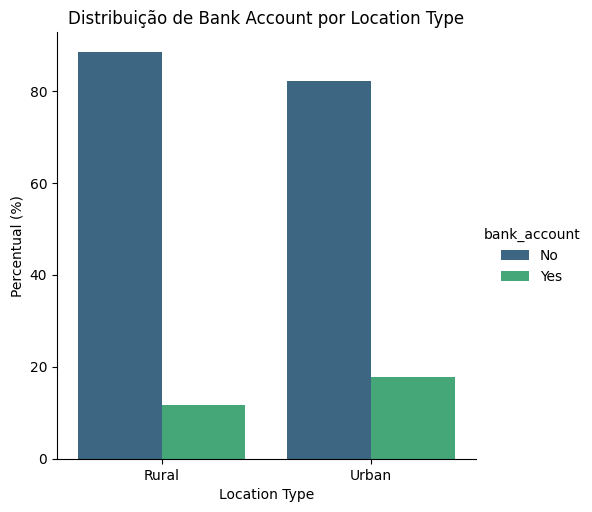

In [388]:
# Calculate the contingency table with percentage
cross_tab = pd.crosstab(df['location_type'], df['bank_account'], normalize='index') * 100

# Convert the table in one dataframe
cross_tab = cross_tab.reset_index()

# Reorganize the data to the long format (tidy)
cross_tab_long = cross_tab.melt(id_vars='location_type', var_name='bank_account', value_name='percentual')

# Create the bar graph with percentage
plt.figure(figsize=(10, 6))
sns.catplot(x='location_type', y='percentual', hue='bank_account', data=cross_tab_long, kind='bar', palette='viridis')

# Add labels and titles
plt.title('Type of location by existence of a bank account')
plt.xlabel('Location Type')
plt.ylabel('Percentage (%)')
plt.show()


<Figure size 1500x1000 with 0 Axes>

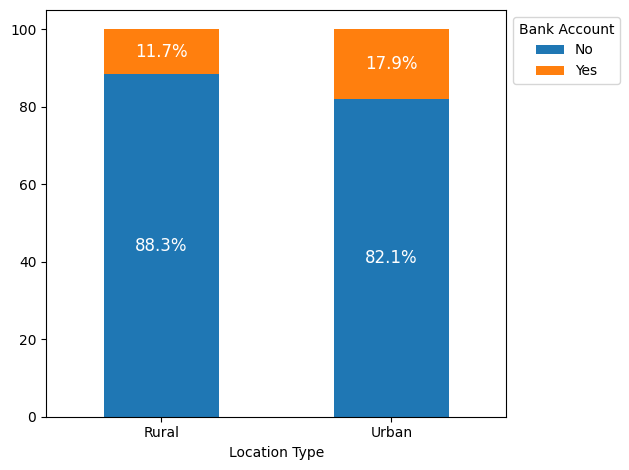

In [411]:
# Calculate the percentages within each country
percentage_data = df.groupby(['location_type', 'bank_account']).size().unstack()
percentage_data = percentage_data.div(percentage_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 10))

# Plot the percentage distribution for each country
ax = percentage_data.plot(kind='bar', stacked=True)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
#plt.title('Type of location by existence of a bank account')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width / 2, y + height / 2), fontsize=12, color='white', ha='center', va='center')

plt.legend(title='Bank Account', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Location Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

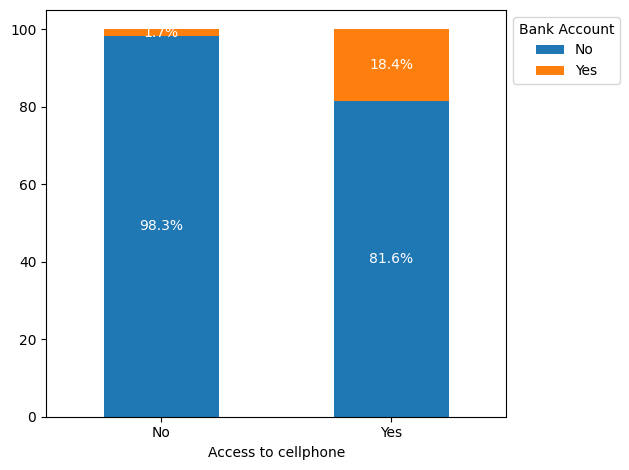

In [413]:
# Calculate the percentages within each country
percentage_data = df.groupby(['cellphone_access', 'bank_account']).size().unstack()
percentage_data = percentage_data.div(percentage_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 10))

# Plot the percentage distribution for each country
ax = percentage_data.plot(kind='bar', stacked=True)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
#plt.title('Access to cellphone by existence of a bank account')


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width / 2, y + height / 2), fontsize=10, color='white', ha='center', va='center')

plt.legend(title='Bank Account', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Access to cellphone')
#plt.legend(title='Bank Account')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

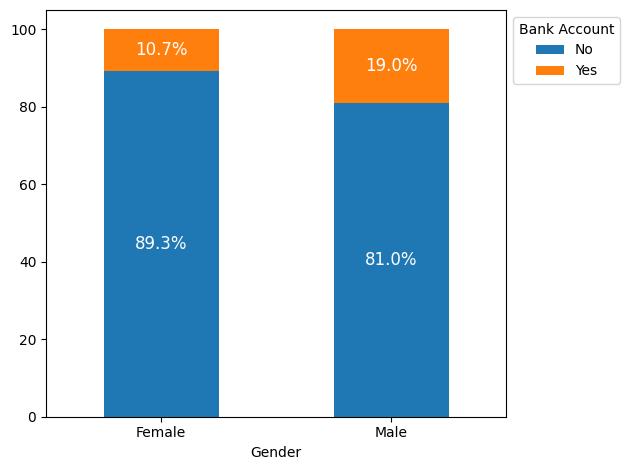

In [414]:
# Calculate the percentages within each country
percentage_data = df.groupby(['gender_of_respondent', 'bank_account']).size().unstack()
percentage_data = percentage_data.div(percentage_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 10))

# Plot the percentage distribution for each country
ax = percentage_data.plot(kind='bar', stacked=True)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
#plt.title('Gender of respondent by existence of a bank account')


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width / 2, y + height / 2), fontsize=12, color='white', ha='center', va='center')

plt.legend(title='Bank Account', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Gender')
#plt.legend(title='Bank Account')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

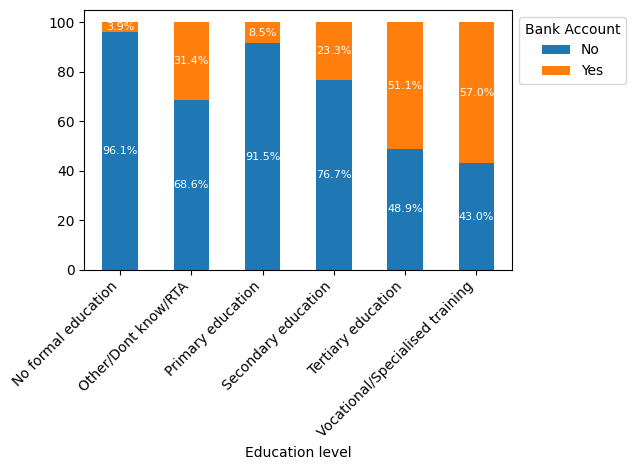

In [415]:
# Calculate the percentages within each country
percentage_data = df.groupby(['education_level', 'bank_account']).size().unstack()
percentage_data = percentage_data.div(percentage_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 10))

# Plot the percentage distribution for each country
ax = percentage_data.plot(kind='bar', stacked=True)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
#plt.title('Education level by existence of a bank account')


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width / 2, y + height / 2), fontsize=8, color='white', ha='center', va='center')

plt.legend(title='Bank Account', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Education level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

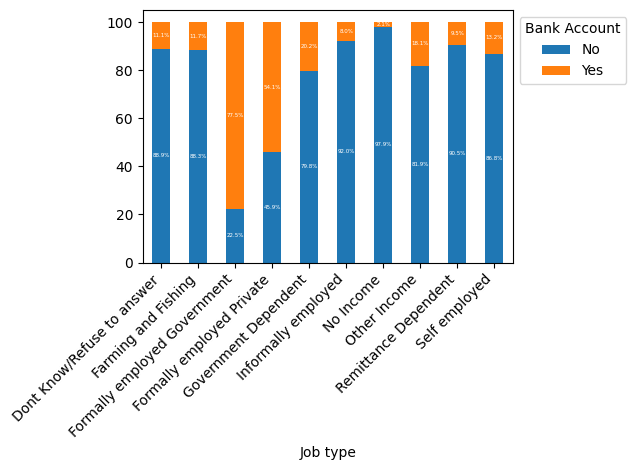

In [420]:
# Calculate the percentages within each country
percentage_data = df.groupby(['job_type', 'bank_account']).size().unstack()
percentage_data = percentage_data.div(percentage_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 10))

# Plot the percentage distribution for each country
ax = percentage_data.plot(kind='bar', stacked=True)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
#plt.title('Job type by existence of a bank account')



for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width / 2, y + height / 2), fontsize=4, color='white', ha='center', va='center')

plt.legend(title='Bank Account', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Job type')
#plt.legend(title='Bank Account')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

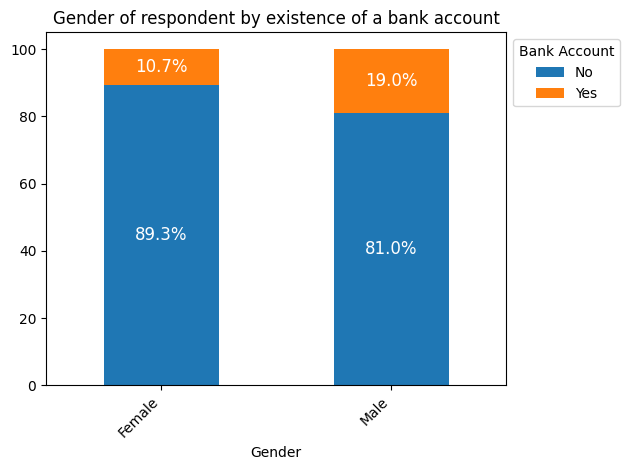

In [400]:
# Calculate the percentages within each country
percentage_data = df.groupby(['gender_of_respondent', 'bank_account']).size().unstack()
percentage_data = percentage_data.div(percentage_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 10))

# Plot the percentage distribution for each country
ax = percentage_data.plot(kind='bar', stacked=True)
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)
plt.title('Gender of respondent by existence of a bank account')


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width / 2, y + height / 2), fontsize=12, color='white', ha='center', va='center')

plt.legend(title='Bank Account', loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Gender')
plt.xticks(rotation=45, ha='right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

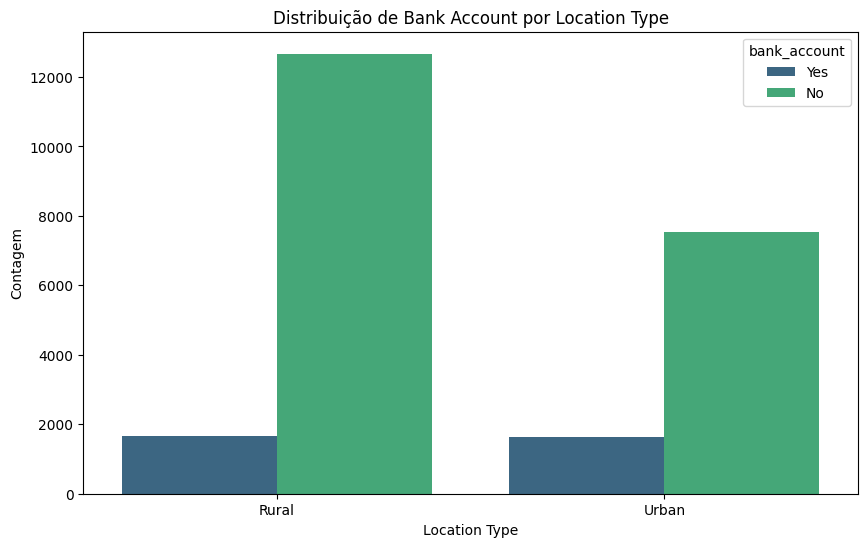

In [386]:

'''# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='location_type', hue='bank_account', data=df, palette='viridis')

# Adiciona rótulos e título
plt.title('Distribuição de Bank Account por Location Type')
plt.xlabel('Location Type')
plt.ylabel('Contagem')
plt.show()


<Figure size 1500x1000 with 0 Axes>

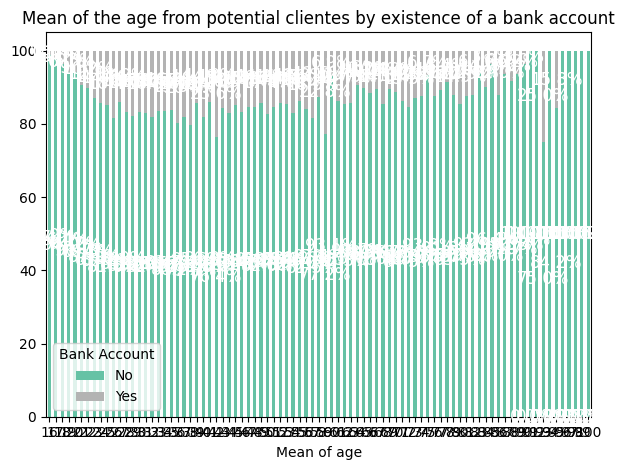

In [417]:
'''# Calculate the percentages within each country
percentage_data = df.groupby(['age_of_respondent', 'bank_account']).size().unstack()
percentage_data = percentage_data.div(percentage_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 10))

# Plot the percentage distribution for each country
ax = percentage_data.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Mean of the age from potential clientes by existence of a bank account')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'
    ax.annotate(percentage, (x + width / 2, y + height / 2), fontsize=12, color='white', ha='center', va='center')

plt.xlabel('Mean of age')
plt.legend(title='Bank Account')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [377]:
pd.crosstab(df['bank_account'], df['location_type'], margins=True)

location_type,Rural,Urban,All
bank_account,,,
No,12672,7540,20212
Yes,1671,1641,3312
All,14343,9181,23524


In [371]:

# Create the contingency table with percentage
cross_tab = pd.crosstab(df['bank_account'], df['location_type'], normalize='columns') * 100

# Show the simple table
print(cross_tab)


location_type      Rural     Urban
bank_account                      
No             88.349718  82.12613
Yes            11.650282  17.87387


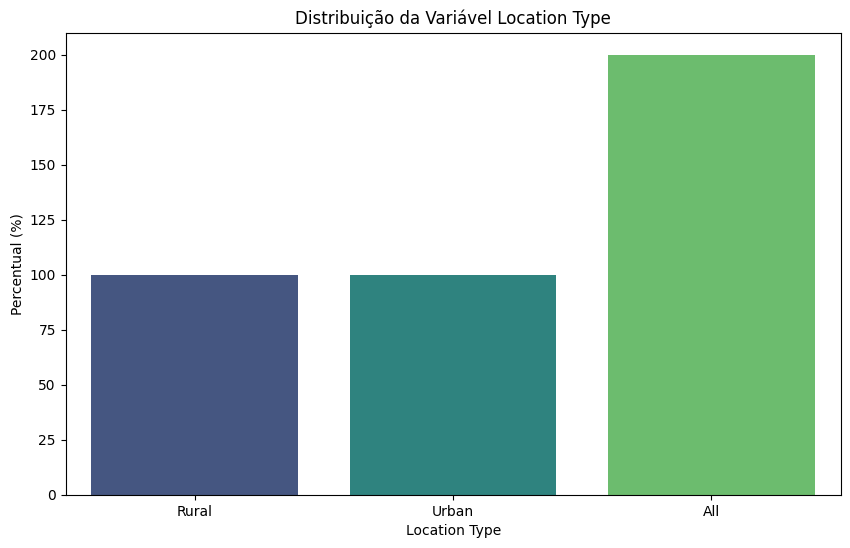

In [364]:
# Create the contingency table with percentage
cross_tab = pd.crosstab(df['bank_account'], df['location_type'], normalize='columns') * 100

# Add the column 'All' that shows the total by line
cross_tab['All'] = cross_tab.sum(axis=1)

# Add the line "All" that shows the total by column
cross_tab.loc['All'] = cross_tab.sum()

# Generate the bar graph using the Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=cross_tab.columns, y=cross_tab.loc['All'], palette='viridis')
plt.title('Distribution of the feature Location Type')
plt.xlabel('Location Type')
plt.ylabel('Percentage (%)')
plt.show()


In [358]:
# List of the additional variables
additional_vars = ['country','cellphone_access', 'gender_of_respondent', 'education_level', 'job_type']

# Add the new variables to the table of contingency (with %)
cross_tab = pd.crosstab(df['bank_account'], [df['location_type']] + [df[var] for var in additional_vars], normalize='columns') * 100

# Add the column 'All' that shows the total by line
cross_tab['All'] = cross_tab.sum(axis=1)

# Add the line "All" that shows the total by column
cross_tab.loc['All'] = cross_tab.sum()

# Show the simple table
print(cross_tab)


location_type                      Rural                       \
country                            Kenya                        
cellphone_access                      No                        
gender_of_respondent              Female                        
education_level      No formal education                        
job_type             Farming and Fishing Government Dependent   
bank_account                                                    
No                             95.098039            85.714286   
Yes                             4.901961            14.285714   
All                           100.000000           100.000000   

location_type                                                               \
country                                                                      
cellphone_access                                                             
gender_of_respondent                                                         
education_level                      

location_type       Rural      Urban         All
bank_account                                    
No              88.349718   82.12613  170.475848
Yes             11.650282   17.87387   29.524152
All            100.000000  100.00000  200.000000


<Figure size 800x600 with 0 Axes>

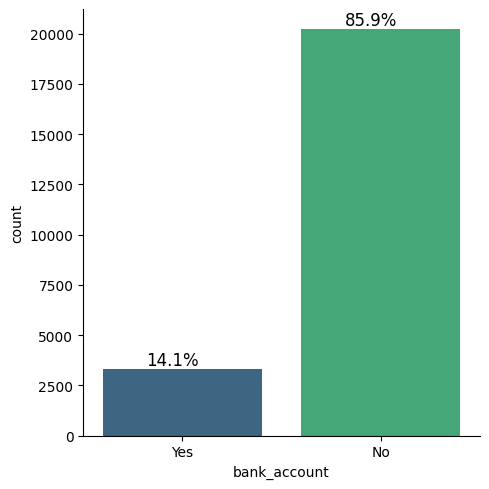

In [344]:
# Create the catplot graph
plt.figure(figsize=(8, 6))
ax = sns.catplot(x="bank_account", kind="count", data=df, palette="viridis")

# Substitute the categories labels
df['bank_account'] = df['bank_account'].replace({0: 'Não', 1: 'Sim'})

# Add the % in the bars
total = len(df['bank_account'])
for p in ax.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height() + 20
    ax.ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12, color='black')

# Shows the graph
plt.show()

In [9]:
# Almost 85% don't have bank account
# Most of the respondents are from the rural area (+- 60%)
# 74% have cellphone, but probably not a smartphone
# A bit more than 50% are head of household. We suspect that there are many people that live alone
# 86% of peolple don't have bank account
# Low level educatiom. 70% with no education or just primary education

# EDA - visualization

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'household_size'}>],
       [<Axes: title={'center': 'age_of_respondent'}>, <Axes: >]],
      dtype=object)

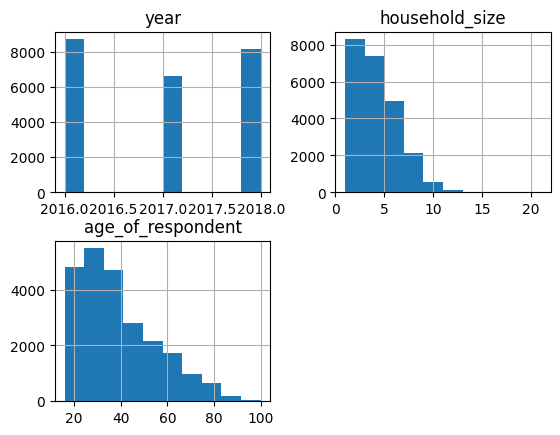

In [10]:
df.hist()

In [11]:
df['household_size'].value_counts().sort_index()

household_size
1     3057
2     5229
3     3920
4     3474
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
14      10
15      11
16       4
17       1
18       1
20       1
21       1
Name: count, dtype: int64

In [12]:
df['relationship_with_head'].value_counts().sort_index()

relationship_with_head
Child                   2229
Head of Household      12831
Other non-relatives      190
Other relative           668
Parent                  1086
Spouse                  6520
Name: count, dtype: int64

In [13]:
df['marital_status'].value_counts().sort_index()

marital_status
Divorced/Seperated          2076
Dont know                      8
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Name: count, dtype: int64

In [14]:
df['education_level'].value_counts().sort_index()

education_level
No formal education                 4515
Other/Dont know/RTA                   35
Primary education                  12791
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Name: count, dtype: int64

In [15]:
df['job_type'].value_counts().sort_index()

job_type
Dont Know/Refuse to answer       126
Farming and Fishing             5441
Formally employed Government     387
Formally employed Private       1055
Government Dependent             247
Informally employed             5597
No Income                        627
Other Income                    1080
Remittance Dependent            2527
Self employed                   6437
Name: count, dtype: int64

In [16]:
df_bak = df.copy()

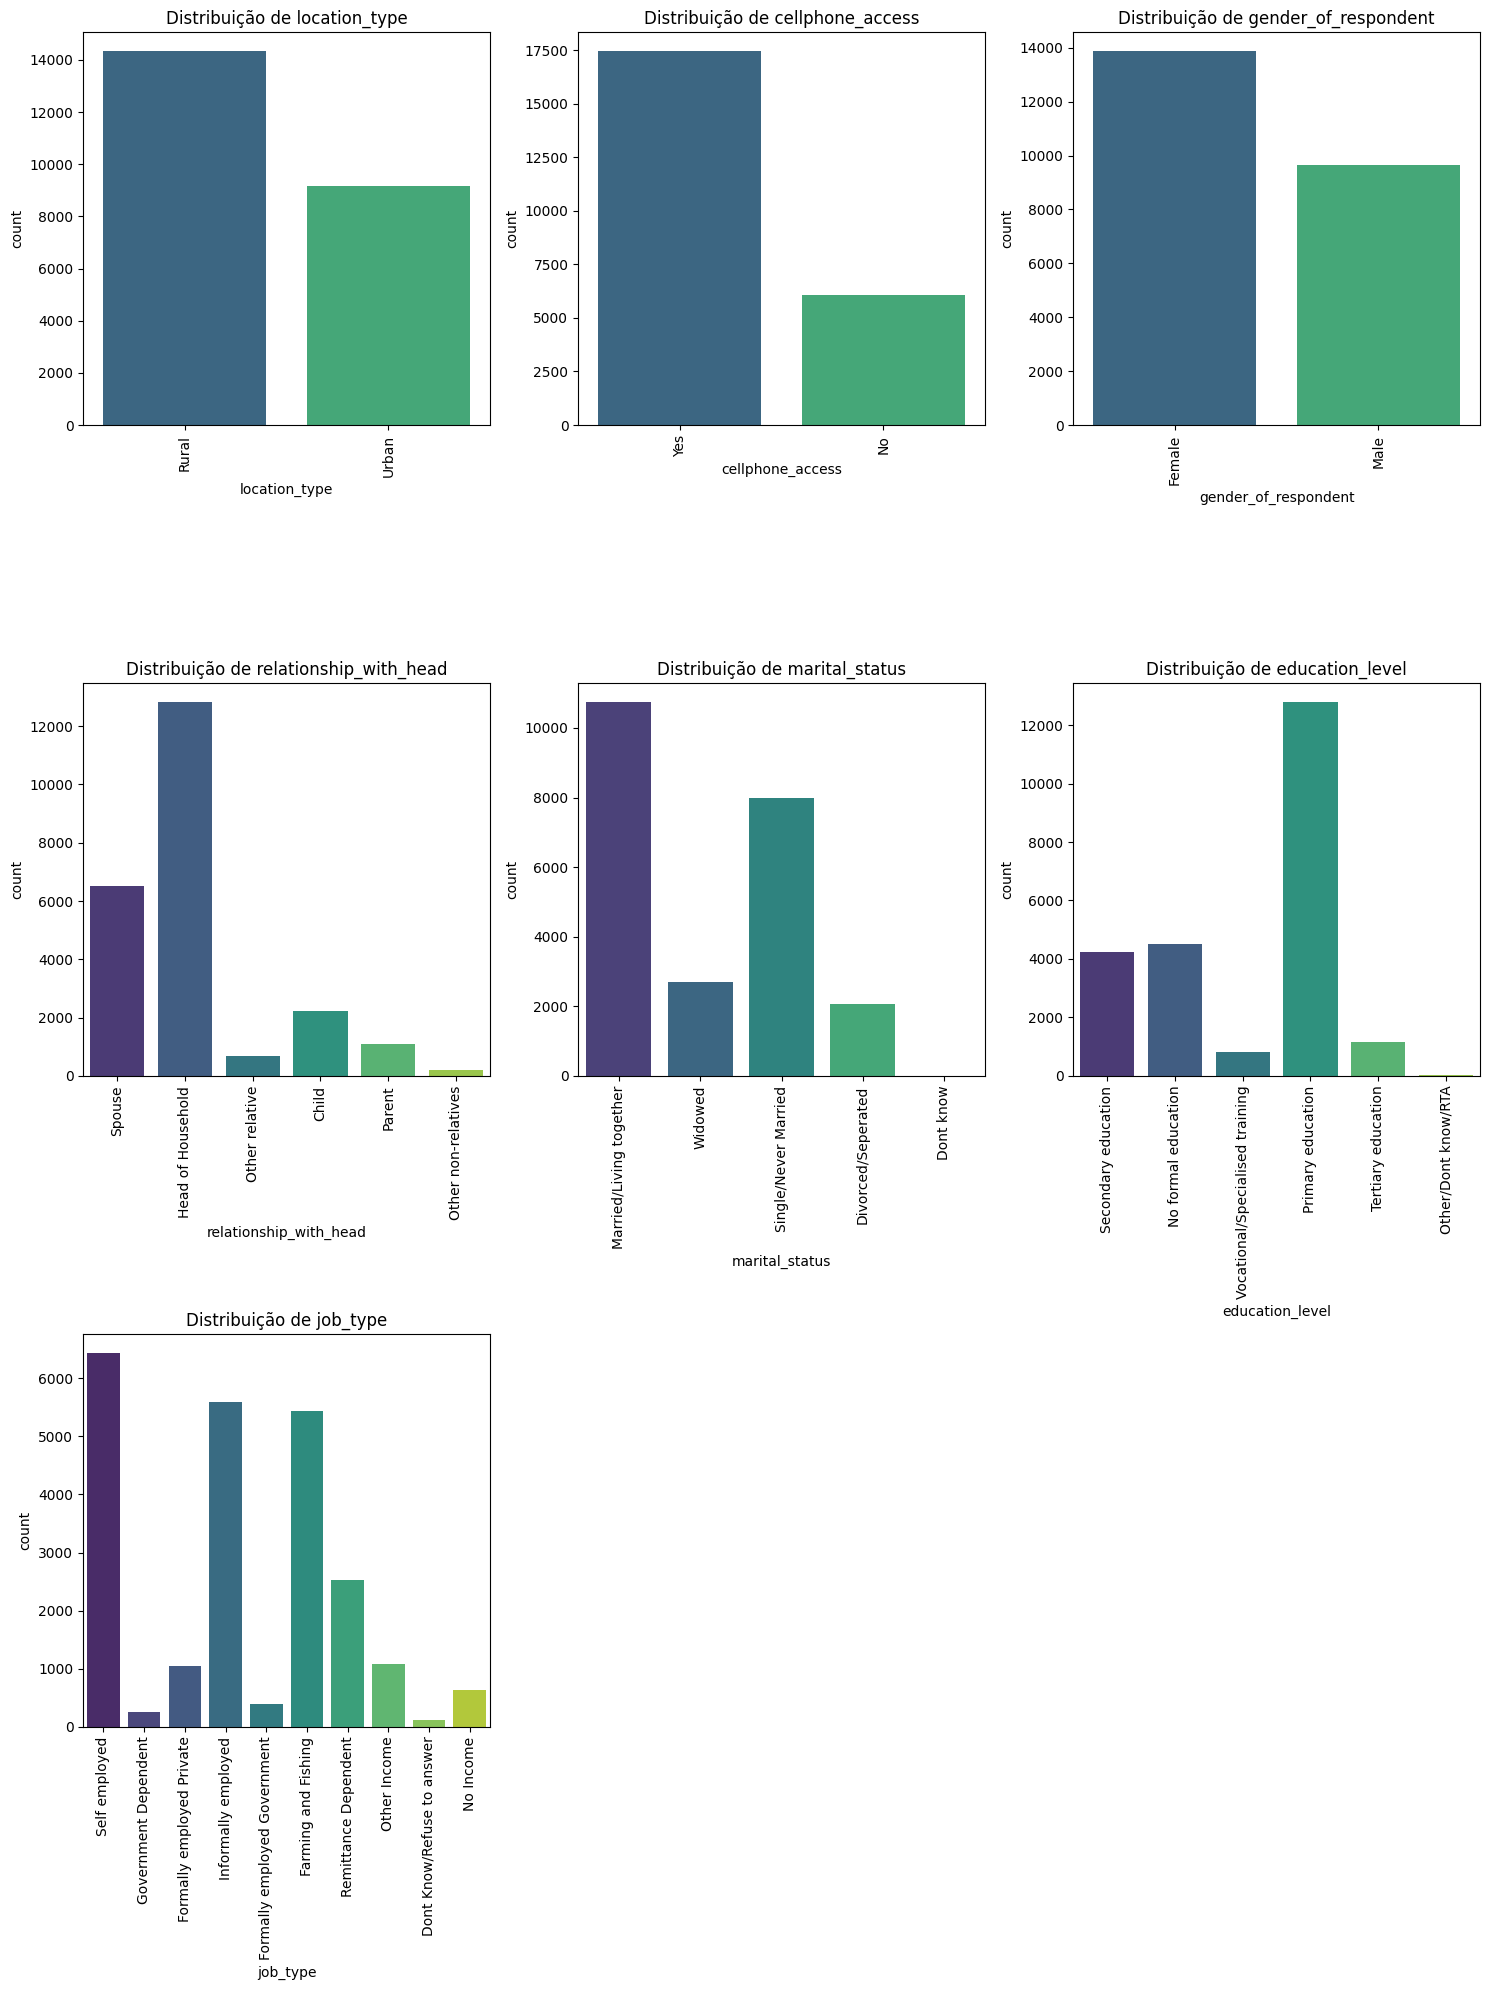

In [17]:
# Select the categoric variables
categorical_vars = ['location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']

# Set the graph size
plt.figure(figsize=(15, 20))

# Loop over the variables to create the subplots
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, data=df, palette='viridis')
    plt.title(f'Distribuição de {var}')
    plt.xticks(rotation=90)

# Adjust the layout
plt.tight_layout()
plt.show()

plt.show()

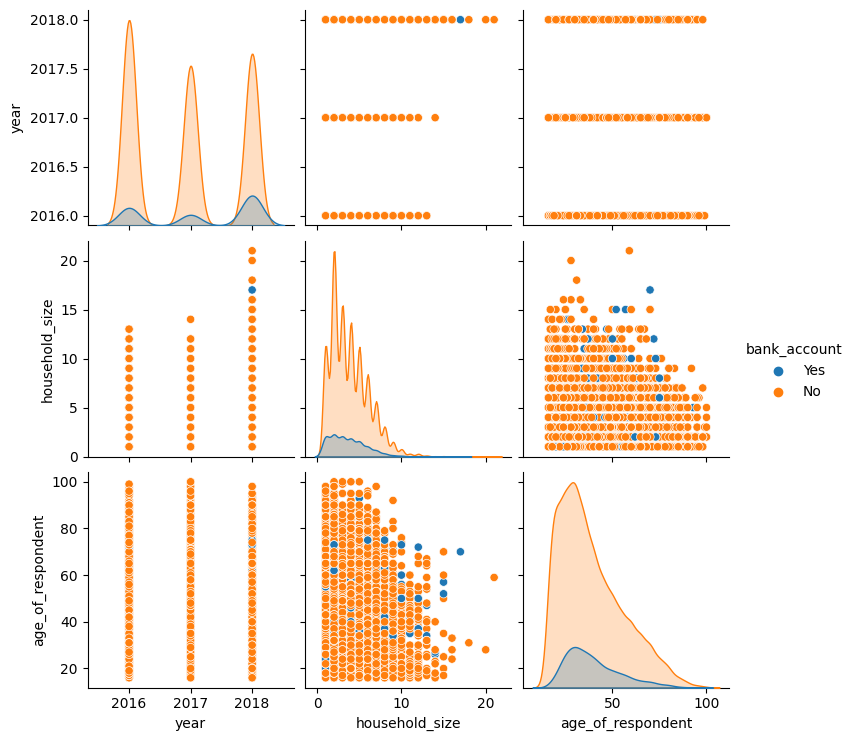

In [18]:
sns.pairplot(df_bak, hue='bank_account')  

# Feature engineering

In [19]:
le = LabelEncoder()
variables_to_encode = ['country', 'year', 'bank_account', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status',  'education_level', 'job_type']
for variable in variables_to_encode:
    df_bak[variable] = le.fit_transform(df_bak[variable])

In [20]:
df_bak.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,uniqueid_1,1,0,1,3,24,0,5,2,3,9
1,0,2,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,0,2,uniqueid_3,1,1,1,5,26,1,3,3,5,9
3,0,2,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,0,2,uniqueid_5,0,1,0,8,26,1,0,3,2,5


In [21]:
df_bak.drop('uniqueid', inplace=True, axis=1) 

In [22]:
df_bak.corr()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
country,1.000000,-0.094991,-0.161362,0.152285,-0.150003,-0.119158,-0.058778,-0.027055,0.130408,0.009282,-0.050706,0.381066
year,-0.094991,1.000000,0.112318,0.214621,-0.066505,-0.052264,-0.019330,0.000317,0.001801,-0.026187,0.173869,0.266323
bank_account,-0.161362,0.112318,1.000000,0.087288,0.209669,-0.028326,0.019429,0.117234,-0.070853,-0.038739,0.323768,-0.064171
location_type,0.152285,0.214621,0.087288,1.000000,-0.085238,-0.257284,-0.047373,0.012924,0.017042,0.080406,0.126128,0.368606
cellphone_access,-0.150003,-0.066505,0.209669,-0.085238,1.000000,0.091360,-0.103611,0.102370,-0.048705,-0.094195,0.252970,-0.146141
household_size,-0.119158,-0.052264,-0.028326,-0.257284,0.091360,1.000000,-0.129729,0.014576,0.104048,-0.127737,0.001613,-0.156835
age_of_respondent,-0.058778,-0.019330,0.019429,-0.047373,-0.103611,-0.129729,1.000000,0.012745,-0.151477,0.222908,-0.352970,-0.102770
gender_of_respondent,-0.027055,0.000317,0.117234,0.012924,0.102370,0.014576,0.012745,1.000000,-0.472048,-0.103238,0.119883,-0.029734
relationship_with_head,0.130408,0.001801,-0.070853,0.017042,-0.048705,0.104048,-0.151477,-0.472048,1.000000,-0.142229,-0.017141,0.041006
marital_status,0.009282,-0.026187,-0.038739,0.080406,-0.094195,-0.127737,0.222908,-0.103238,-0.142229,1.000000,-0.123628,0.056011


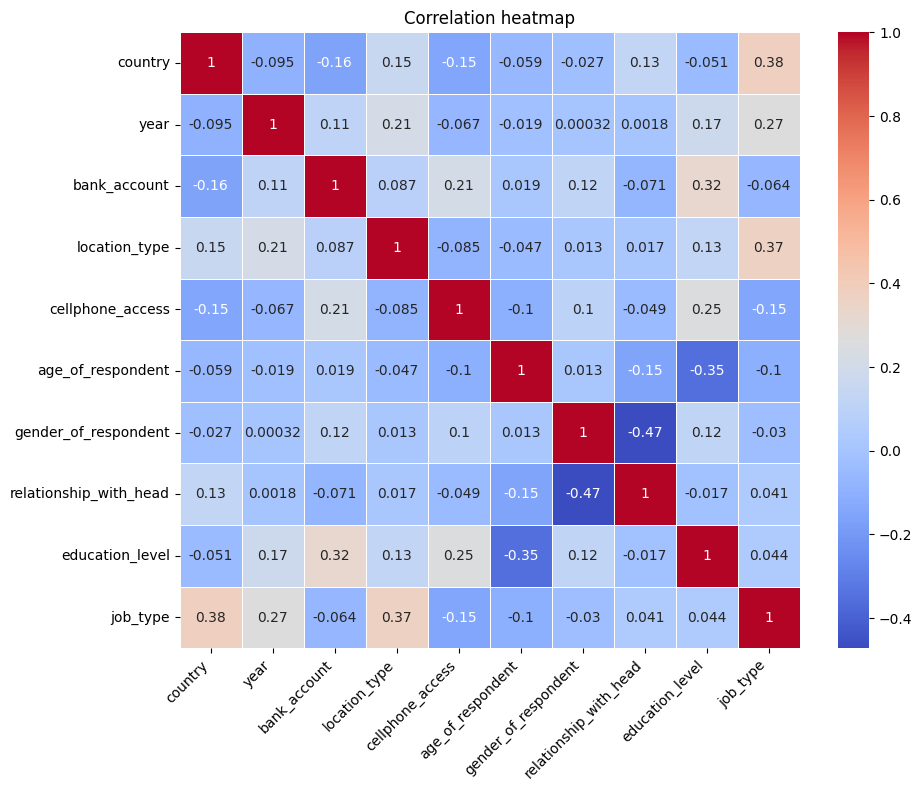

In [421]:
# Selecionar as colunas que deseja incluir no heatmap
cols = ['job_type', 'bank_account']


# Criar uma matriz de correlação entre as colunas selecionadas
correlation_matrix = df_bak.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))

# Criar o heatmap com cores
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Definir o título do heatmap
plt.title('Correlation heatmap')
plt.xticks(rotation=45, ha='right')

# Exibir o heatmap
plt.show()


In [24]:
df_bak.drop(['household_size', 'marital_status'], inplace=True, axis=1) 

In [25]:
df_bak.head()

,country,year,bank_account,location_type,cellphone_access,age_of_respondent,gender_of_respondent,relationship_with_head,education_level,job_type
0,0,2,1,0,1,24,0,5,3,9
1,0,2,0,0,0,70,0,1,0,4
2,0,2,1,1,1,26,1,3,5,9
3,0,2,0,0,1,34,0,1,2,3
4,0,2,0,1,0,26,1,0,2,5


In [26]:
df_bak.shape

(23524, 10)

# Hypothesis

#### Most peolple that don't have bank account are from rural area.
#### Peolple with cell phones have no bank account
#### Peolple with high education have more access to bank account
#### Profile from bank accounter

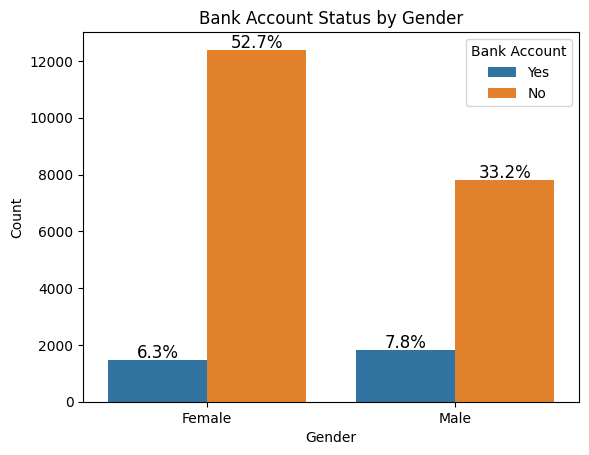

In [27]:
ax = sns.countplot(x='gender_of_respondent', hue='bank_account', data=df)
# Add percentages inside the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
# Customize the plot
plt.title("Bank Account Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Bank Account', labels=['Yes', 'No'])
# Show the plot
plt.show()

In [28]:
df_ori = df.copy()

In [54]:
df = df_ori.copy()

In [55]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

# Feature engineering

1. Treat missing values    
Drop samples, drop the feature, impute them (mean/median/mode, draw numbers from the same distribution, conditional values - kNN k-nearest neighbors im feature space) 
2. Decide with features to use    
We dropped the features 'uniqueID', 'household_size', 'marital_status' based on the correlation analysis.
3. Decide on a model     
Logistic Regression, kNN Classifier,  (take the majority value of the k nearest neighbors)
4. Treat the features accordingly
'country' - OHE (one-hot-encode)   
'year' - OHE
'uniqueid' - drop
'bank_account' - in the 'Target/Y file' drop
'location_type' - Label encoding
'cellphone_access' - Label encoding
'household_size' - drop
'age_of_respondent' - KBinDiscretizer (OHE)
'gender_of_respondent' - Label encoding
'relationship_with_head' - OHE
'marital_status' - drop
'education_level' - OHE
'job_type' - OHE

# Getting dummies

In [168]:
df_dumvar = df.copy()

In [169]:
df_dumvar.drop(['household_size', 'marital_status','uniqueid'], inplace=True, axis=1) 

In [171]:
df_dumvar['year'] = df_dumvar['year'].astype(str)

In [183]:
le = LabelEncoder()
variables_to_encode = ['bank_account']
for variable in variables_to_encode:
    df_dumvar[variable] = le.fit_transform(df_dumvar[variable])

In [184]:
df_dumvar.dtypes

country                   object
year                      object
bank_account               int32
location_type             object
cellphone_access          object
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
education_level           object
job_type                  object
dtype: object

In [297]:
df_dumvar

,country,year,bank_account,location_type,cellphone_access,age_of_respondent,gender_of_respondent,relationship_with_head,education_level,job_type
0,Kenya,2018,1,Rural,Yes,24,Female,Spouse,Secondary education,Self employed
1,Kenya,2018,0,Rural,No,70,Female,Head of Household,No formal education,Government Dependent
2,Kenya,2018,1,Urban,Yes,26,Male,Other relative,Vocational/Specialised training,Self employed
3,Kenya,2018,0,Rural,Yes,34,Female,Head of Household,Primary education,Formally employed Private
4,Kenya,2018,0,Urban,No,26,Male,Child,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,0,Rural,Yes,48,Female,Head of Household,No formal education,Other Income
23520,Uganda,2018,0,Rural,Yes,27,Female,Head of Household,Secondary education,Other Income
23521,Uganda,2018,0,Rural,Yes,27,Female,Parent,Primary education,Other Income
23522,Uganda,2018,0,Urban,Yes,30,Female,Parent,Secondary education,Self employed


In [185]:
df_dum = pd.get_dummies(df_dumvar)

In [262]:
df_dum

,bank_account,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018,location_type_Rural,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1,0.0,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
1,0,3.0,True,False,False,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False
2,1,0.0,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,1.0,True,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
4,0,0.0,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,0,1.0,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
23520,0,0.0,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
23521,0,0.0,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
23522,0,0.0,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [144]:
'''df_enc = df_bak.copy()

# Spliting the data and balancing the data

In [30]:
#!pip install -U imbalanced-learn

In [32]:
#from imblearn.over_sampling import SMOTE
#oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

NameError: name 'RandomOverSampler' is not defined

In [286]:

# Reshape the 'age_of_respondent' column to a 2D array
age_values = df_dum['age_of_respondent'].values.reshape(-1, 1)

# Create KBinsDiscretizer instance
kbin_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Fit and transform the 'age_of_respondent' column
age_bins = kbin_discretizer.fit_transform(age_values)

# Replace the original 'age_of_respondent' column with the discretized values
df_dum['age_of_respondent'] = age_bins


In [287]:
df_dum.head()

,bank_account,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018,location_type_Rural,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1,0.0,True,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
1,0,7.0,True,False,False,False,False,False,True,True,...,False,False,False,False,True,False,False,False,False,False
2,1,0.0,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,2.0,True,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
4,0,0.0,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [288]:
# select the target
X = df_dum.drop(['bank_account'], axis=1)
y = df_dum['bank_account']

In [289]:
# spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling

In [290]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

In [293]:
X_resampled, y_resampled = oversampler.fit_resample(X_train,y_train)

In [294]:
y_resampled.value_counts().sort_index()

bank_account
0    16149
1    16149
Name: count, dtype: int64

In [231]:
'''#pipeline_age = Pipeline([('age_of_respondent', KBinsDiscretizer())])

#pipeline_embarked = Pipeline([('country','year' OneHotEncoder())])

my_column_transfomer = ColumnTransformer([('ohe', OneHotEncoder(sparse=False), ['country', 'year', 'relationship_with_head', 'education_level', 'job_type']),
                                         ('bin', KBinsDiscretizer(), ['age_of_respondent']),
                                         ], remainder='drop')

# remainder = everything not mentioned in the ColumnTransformer 
# `drop` = don't use them, `passthrough` - use them as they are

SyntaxError: incomplete input (2003349819.py, line 5)

In [273]:
knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [220]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [295]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)

RandomForestClassifier()

# Running the model

In [296]:
# Random Forest

y_pred = rf.predict(X_test)

# Print accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("-----"*10)

# Print confusion matrix
#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

Accuracy: 0.7934112646121148
Recall: 0.7040498442367601
--------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (seu código para treinar o modelo e fazer previsões)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Configurar a plotagem para evitar notação científica
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Plotar a matriz de confusão com rótulos formatados
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGn', cbar=False)

# Adicionar rótulos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Logistic regression prediction

logistic_regression = LogisticRegression()
logistic_regression.fit(X_resampled2, y_resampled2)
y_pred = logistic_regression.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

#sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGn');

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Configurar a plotagem para evitar notação científica
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Plotar a matriz de confusão com rótulos formatados
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGn', cbar=False)

# Adicionar rótulos
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')

# GRID

In [299]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Set the values for each paramter you would like to check

In [312]:
params_dict = {'bootstrap': [True, False],'n_estimators': [200, 100, 50, 10],
               'max_depth': [5,10,15]}

In [313]:
gridsearch = GridSearchCV(rf, params_dict, cv=5, n_jobs=-1)

In [314]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [200, 100, 50, 10]})

In [315]:
gridsearch.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 100}

In [316]:
gridsearch.best_estimator_.score(X_test, y_test)

0.8884165781083954

In [317]:
# Random forest prediction

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criando uma instância do classificador RandomForest
rf_classifier = RandomForestClassifier(bootstrap = True, n_estimators=100, max_depth=10, random_state=42)

# Treinando o modelo no conjunto de treinamento
rf_classifier.fit(X_resampled, y_resampled)

# Fazendo previsões no conjunto de teste
y_pred = rf_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.7859723698193412
Recall: 0.7694704049844237


In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')

# Bosting

### Max Voting 

In [340]:
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state = 42)
model2 =  KNeighborsClassifier()
model3 = RandomForestClassifier(bootstrap = True, n_estimators=100, max_depth=10,random_state = 42)

model = VotingClassifier(estimators = [('lr', model1), ('knn', model2), ('dt', model3)], voting = 'hard')
model.fit(X_resampled, y_resampled)
model.score(X_test,y_test)

0.8195536663124335

## Averaging

In [322]:
from sklearn.tree import DecisionTreeClassifier

In [324]:
model1 = LogisticRegression(random_state = 42)
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier(bootstrap = True, n_estimators=100, max_depth=10,random_state = 42)

model1.fit(X_resampled, y_resampled)
model2.fit(X_resampled, y_resampled)
model3.fit(X_resampled, y_resampled)

pred1 = model1.predict_proba(X_test)
pred2 = model2.predict_proba(X_test)
pred3 = model3.predict_proba(X_test)

finalpred = (pred1 + pred2 + pred3) / 3
finalpred = np.argmax(finalpred.round(0), axis = 1)
(y_test == finalpred).sum() / len(finalpred)

0.852922422954304

## Weighted Average

In [422]:
model1 = LogisticRegression(random_state = 42)
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier(bootstrap = True, n_estimators=100, max_depth=10,random_state = 42)

model1.fit(X_resampled, y_resampled)
model2.fit(X_resampled, y_resampled)
model3.fit(X_resampled, y_resampled)

pred1 = model1.predict_proba(X_test)
pred2 = model2.predict_proba(X_test)
pred3 = model3.predict_proba(X_test)

acc1 = accuracy_score(y_test, model1.predict(X_test))
acc2 = accuracy_score(y_test, model2.predict(X_test))
acc3 = accuracy_score(y_test, model3.predict(X_test))

acc_sum = acc1 + acc2 + acc3

weight1 = acc1/acc_sum
weight2 = acc2/acc_sum
weight3 = acc3/acc_sum

finalpred = (pred1*weight1 + pred2*weight2 + pred3*weight3)
finalpred = np.argmax(finalpred.round(0), axis = 1)
(y_test == finalpred).sum() / len(finalpred)

0.8544102019128587

In [424]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [425]:
r2 = r2_score(y_test, finalpred)
print("R-squared (R²):", r2)

R-squared (R²): -0.23557282765293985


In [426]:
mae = mean_absolute_error(y_test, finalpred)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.14558979808714134


In [428]:
mse = mean_squared_error(y_test, finalpred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.14558979808714134


In [427]:
rmse = np.sqrt(mean_squared_error(y_test, finalpred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.381562312194406


In [342]:
print(classification_report(y_test, finalpred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      4063
           1       0.47      0.63      0.54       642

    accuracy                           0.85      4705
   macro avg       0.71      0.76      0.73      4705
weighted avg       0.87      0.85      0.86      4705



Text(0.5, 1.0, 'Confusion Matrix\nAccuracy: 0.85')

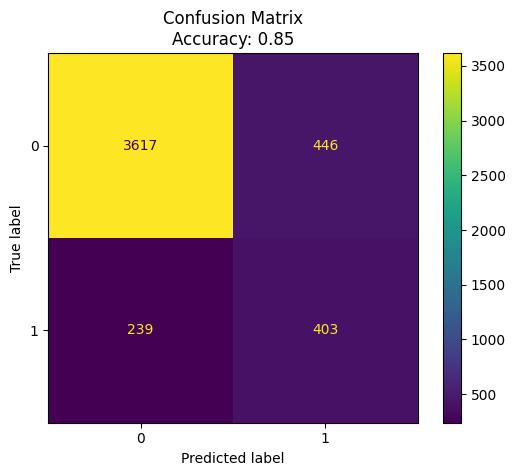

In [343]:
# Create a confusion matrix
cm = confusion_matrix(y_test, finalpred)

# Calculate accuracy
accuracy = accuracy_score(y_test, finalpred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')

## Stacking 

In [329]:
# Implementation of Stacking in Scikit-Learn
from sklearn.ensemble import StackingClassifier

estimators = [
    ('dt', DecisionTreeClassifier(random_state = 42)),
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier(random_state = 42))
]

clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())
clf.fit(X_resampled, y_resampled).score(X_test, y_test)

0.79596174282678

In [ ]:
# Evaluate your model
print(classification_report(y_test, y_pred))

## XGBoost

In [337]:
# Fit model to training data
xgb = XGBClassifier(random_state=42,
                    n_jobs=-1,
                    n_estimators=1000,
                    learning_rate=0.3,
                    subsample=0.5,
                    )
xgb.fit(X_resampled, y_resampled).score(X_test, y_test)
# Make predictions on test set
#y_pred = xgb.predict(X_test)

0.7912858660998937

In [335]:
# Evaluate your model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      4063
           1       0.37      0.74      0.49       642

    accuracy                           0.79      4705
   macro avg       0.66      0.77      0.68      4705
weighted avg       0.87      0.79      0.82      4705

